# Import the model and calculate the PSF

In [1]:
import pyfftw
import numexpr as ne
import mkl_fft
# import pyculib
from numba import cuda
import pyopencl
import pyopencl.array
# import clfft
# import gpyfft

In [2]:
import poppy
import proper
import numpy as np
import astropy.units as u
import astropy.io.fits as fits

import os
import psutil

from importlib import reload
import misc
reload(misc)
import romancgi_modes as modes
reload(modes)
import polmap
reload(polmap)

from IPython.display import clear_output, display
clear_output()

In [3]:
import poppy
import poppy.accel_math as am
print(am._USE_CUDA)
print(am._USE_OPENCL)
print(am._USE_NUMEXPR)
print(am._USE_FFTW)
print(am._USE_MKL)

ncpus = os.cpu_count()
print(ncpus, poppy.conf.n_processes)
print(psutil.virtual_memory().total/1e9, psutil.virtual_memory().available/1e9)
print(psutil.virtual_memory().free/1e9, psutil.virtual_memory().used/1e9, psutil.virtual_memory().percent)

False
False
True
True
True
96 4
540.920410112 469.046304768
177.102811136 69.358321664 13.3


In [4]:
poppy.conf.use_numexpr = True
poppy.conf.use_fftw = True
poppy.conf.use_mkl = True
print(poppy.conf.use_numexpr)
print(poppy.conf.use_fftw)
print(poppy.conf.use_mkl)

True
True
True


DEBUG:poppy:Display pixel scale = 0.0023633372 m / pix 


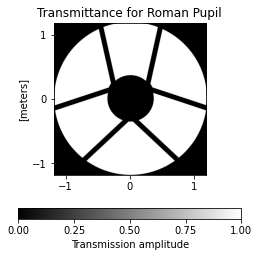

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


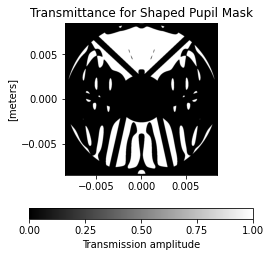

DEBUG:poppy:Display pixel scale = 0.003185607804091188 arcsec / pix 


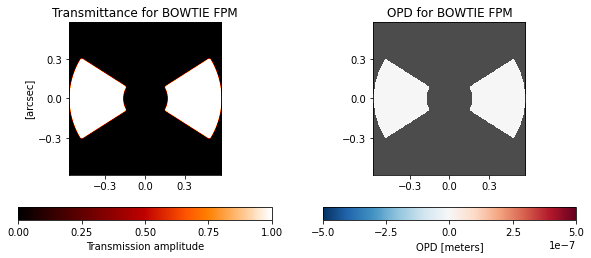

DEBUG:poppy:Display pixel scale = 1.7e-05 m / pix 


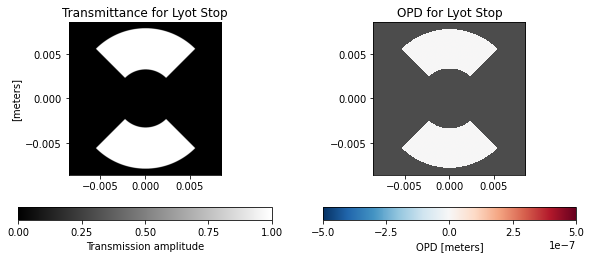

DEBUG:poppy:Display pixel scale = 4.63008110546162e-05 m / pix 


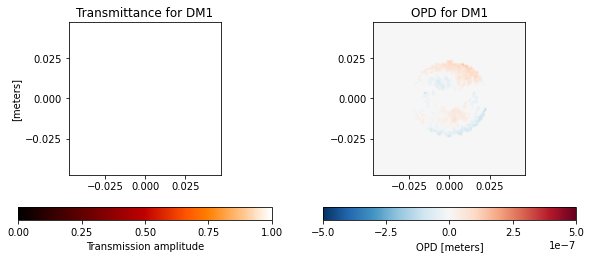

DEBUG:poppy:Display pixel scale = 4.63008110546162e-05 m / pix 


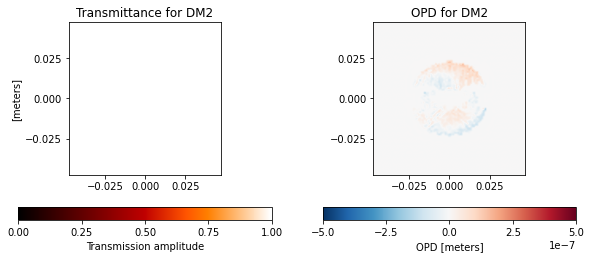

INFO:poppy:Computing intensity for Fieldstop Plane (No Optic) sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 


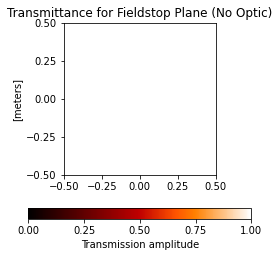

DEBUG:poppy:Display pixel scale = 0.0023633372 m / pix 


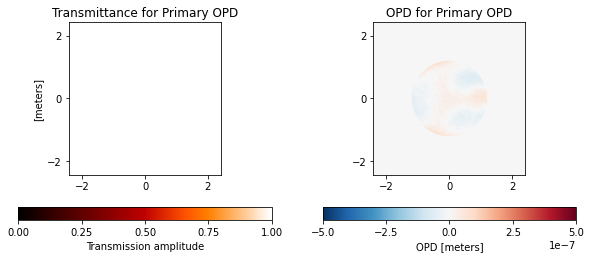

DEBUG:poppy:Padded WF array for oversampling by 2, to (2000, 2000).

Employing polarization aberrations.



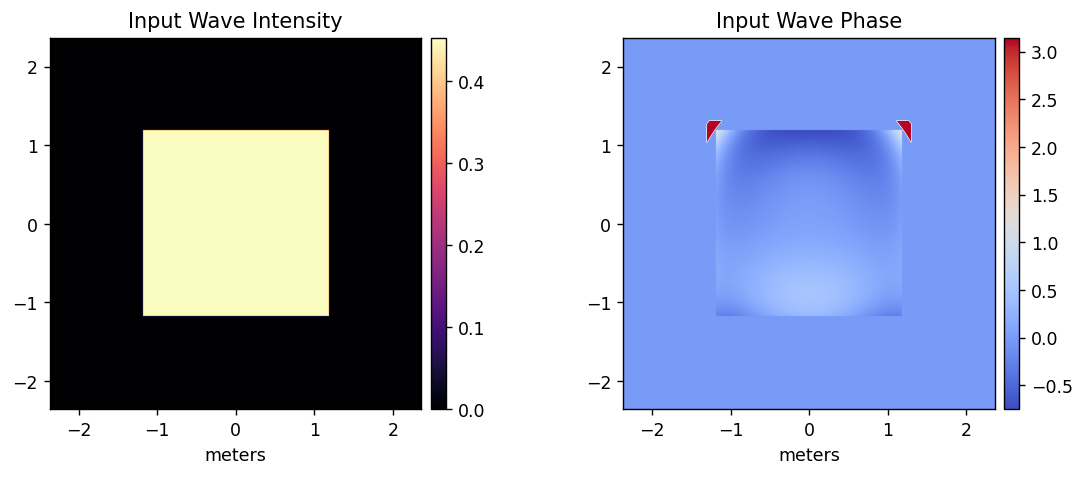

INFO:poppy:Initialized OpticalSystem: SPC730
INFO:poppy:Added optic: Roman Pupil after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary after separation: 0.00e+00 m 
INFO:poppy:Added optic: Primary OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: G2O OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Secondary after separation: 2.29e+00 m 
INFO:poppy:Added optic: Secondary OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 1 after separation: 2.99e+00 m 
INFO:poppy:Added optic: Fold-1 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M3 after separation: 1.68e+00 m 
INFO:poppy:Added optic: M3 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M4 after separation: 9.44e-01 m 
INFO:poppy:Added optic: M4 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: M5 after separation: 4.29e-01 m 
INFO:poppy:Added optic: M5 OPD after separation: 0.00e+00 m 
INFO:poppy:Added optic: Fold 2 after separation: 3.51e-01 m 
INFO:poppy:Added optic: Fo

DEBUG:poppy:  Trimmed a border of 24 x 24 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: Primary OPD
DEBUG:poppy:  Propagating wavefront to Optic: G2O OPD after distance 0.0 m 
DEBUG:poppy:Array shape (2048, 2048) is larger than desired shape [2000, 2000]; will crop out just the center part.
DEBUG:poppy:  Trimmed a border of 24 x 24 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: G2O OPD
DEBUG:poppy:  Propagating wavefront to Lens: Secondary, with focal length -0.6542007965680045 m after distance 2.285150515460035 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 2.8382792069040867 m
DEBUG:poppy:  Spherical to Spherical, Outside Z_R to waist (z_w0) to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 0.0023633372 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=2.8382792069040867 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.162396 s, full functio

DEBUG:poppy:  Starting Pixelscale: 0.00014080132565041063 m / pix
DEBUG:poppy:Spherical to Waist propagation, dz=0.7088416003461306 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.061205 s, full function  in 0.067 s
DEBUG:poppy:Applying spherical phase curvature =7.09e-01 m
DEBUG:poppy:Applying spherical lens phase =1.41e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:  Intermediate Pixelscale: 1.8375337230042847e-06 m / pix
DEBUG:poppy:Waist to Spherical propagation, dz=0.23467314901281355 m
DEBUG:poppy:Applying spherical phase curvature =2.35e-01 m
DEBUG:poppy:Applying spherical lens phase =4.26e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.060971 s, full function  in 0.066 s
DEBUG:poppy:------ Propagat

DEBUG:poppy:  Beam radius at OAP1 =2.01e-02 m
DEBUG:poppy: input flat wavefront and OAP1 has output beam curvature of =-5.03e-01 m
DEBUG:poppy:OAP1 has a curvature of =-5.03e-01 m
DEBUG:poppy:OAP1 has a curved output wavefront, with waist at 9.907188083462472 m
DEBUG:poppy:Post Optic Parameters:w_0:5.813e-06 m, z_w0=9.907e+00 m
z=9.404e+00 m, z_r=1.454e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.503331895563883 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =6.03e+06 m
DEBUG:poppy:Applying spherical lens phase =1.66e-07 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP1
DEBUG:poppy:------ Optic: OAP1 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP1 OPD after distance 0.0 m 
DEBUG:poppy:Array shape (2048, 2048) is larger than desired shape [2000, 2000]; will crop out just the center part.
DEBUG:poppy:  Trimmed a border 

DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.060360 s, full function  in 0.066 s
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.060815 s, full function  in 0.067 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.27e+01 m ------
DEBUG:poppy:------ Applying Lens: OAP3 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:2.315e-02 m, z_w0=1.173e+01 m
z=1.266e+01 m, z_r=2.306e+03 m
DEBUG:poppy:  Beam radius at OAP3 =2.32e-02 m
DEBUG:poppy: input flat wavefront and OAP3 has output beam curvature of =-1.22e+00 m
DEBUG:poppy:OAP3 has a curvature of =-1.22e+00 m
DEBUG:poppy:OAP3 has a curved output wavefront, with waist at 13.874230757469238 m
DEBUG:poppy:Post Optic Parameters:w_0:1.222e-05 m, z_w0=1.387e+01 m
z=1.266e+01 m, z_r=6.425e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -1.217276467668519 m
DEBUG:poppy:Output bea

DEBUG:poppy: input flat wavefront and OAP5 has output beam curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curvature of =-5.48e-01 m
DEBUG:poppy:OAP5 has a curved output wavefront, with waist at 15.701194120704749 m
DEBUG:poppy:Post Optic Parameters:w_0:1.499e-05 m, z_w0=1.570e+01 m
z=1.515e+01 m, z_r=9.664e-04 m
DEBUG:poppy:Magnification: -0.0  from R_in = inf m, R_out = -0.548189351937178 m
DEBUG:poppy:Output beam focal length is now 0.0 m
DEBUG:poppy:Inside Rayleigh distance to Outside Rayleigh distance.
DEBUG:poppy:Applying spherical phase curvature =1.76e+05 m
DEBUG:poppy:Applying spherical lens phase =5.67e-06 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP5
DEBUG:poppy:------ Optic: OAP5 applied ------
DEBUG:poppy:  Propagating wavefront to Optic: OAP5 OPD after distance 0.0 m 
DEBUG:poppy:Array shape (2048, 2048) is larger than desired shape [2000, 2000]; will crop out just the center part.
DEBUG:poppy:  Trimmed a border of 24 x 24 pixels to match the desired shape


DEBUG:poppy:  Trimmed a border of 1048 x 1048 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: OAP7 OPD
DEBUG:poppy:  Propagating wavefront to Optic: Fieldstop Plane (No Optic) after distance 0.708251083480054 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 18.04694855893784 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.7082474089774777 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.060407 s, full function  in 0.066 s
DEBUG:poppy:Applying spherical phase curvature =7.08e-01 m
DEBUG:poppy:Applying spherical lens phase =1.41e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT in 0.059824 s, full function  in 0.066 s
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FF

DEBUG:poppy:Array shape (4096, 4096) is larger than desired shape [2000, 2000]; will crop out just the center part.
DEBUG:poppy:  Trimmed a border of 1048 x 1048 pixels to match the desired shape
DEBUG:poppy:  Multiplied WF by phasor for Optic: Fold-4 OPD
DEBUG:poppy:  Propagating wavefront to Optic: focus after distance 0.05000157851465 m 
DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 19.09317464503113 m
DEBUG:poppy:  Spherical to Plane Regime, outside Z_R to inside Z_R
DEBUG:poppy:Spherical to Waist propagation, dz=0.04996724945080189 m
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.060838 s, full function  in 0.066 s
DEBUG:poppy:Applying spherical phase curvature =5.00e-02 m
DEBUG:poppy:Applying spherical lens phase =2.00e+01 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using mkl_fft FFT of (2000, 2000) array, FFT_direction=forward
DEBUG:poppy:    FFT_2D: FFT

<Figure size 1080x1080 with 0 Axes>

FPM shape and pixelscale:  (2000, 2000) 1.176964836139641e-05 m / pix 0.003185607804091188 arcsec / pix


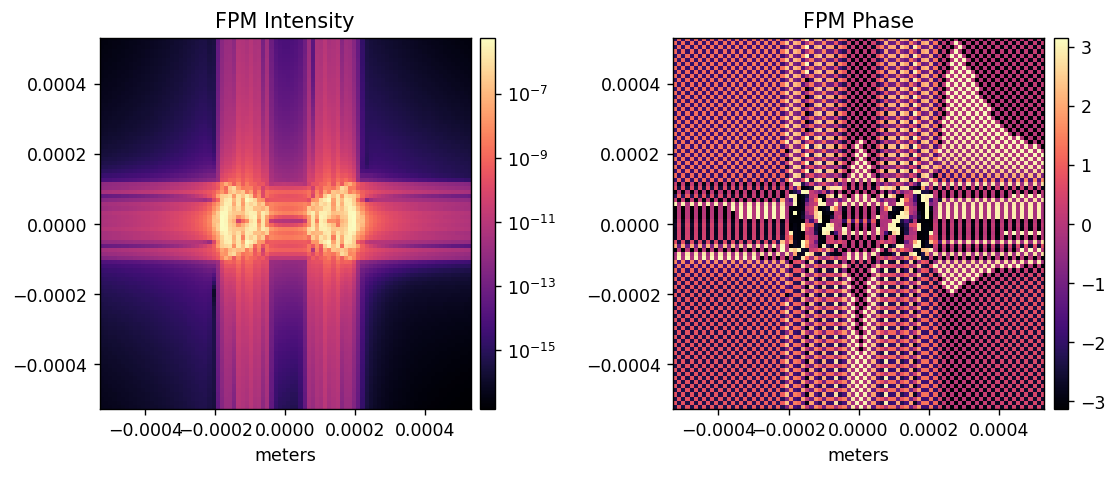

PSF shape and pixelscale:  (2000, 2000) 2.133167626733244e-05 m / pix


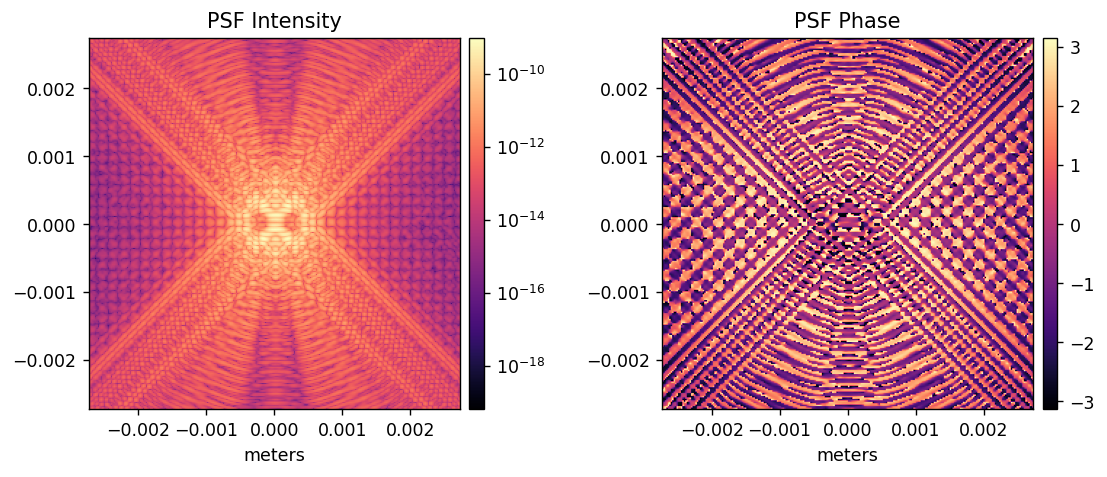

In [18]:
reload(modes)

mode = 'SPC730'
use_dms = True
use_errors = True
use_apertures = False
polaxis = 10

psf, wfs = modes.run_model(npix=1000,
                           oversample=2,
                           mode=mode,
#                            lambda_m=600e-9*u.m, 
#                            offsets=(4.5,0),
                           use_fpm=True,
                           use_errors=use_errors,
                           use_dms=use_dms, 
                           use_fieldstop=True,
                           use_apertures=use_apertures,
                           polaxis=polaxis,
#                            display_intermediates=True,
                           debug=True)

2.133167626733244e-05 4.26692839634194e-06 0.1 (2, 512, 512)


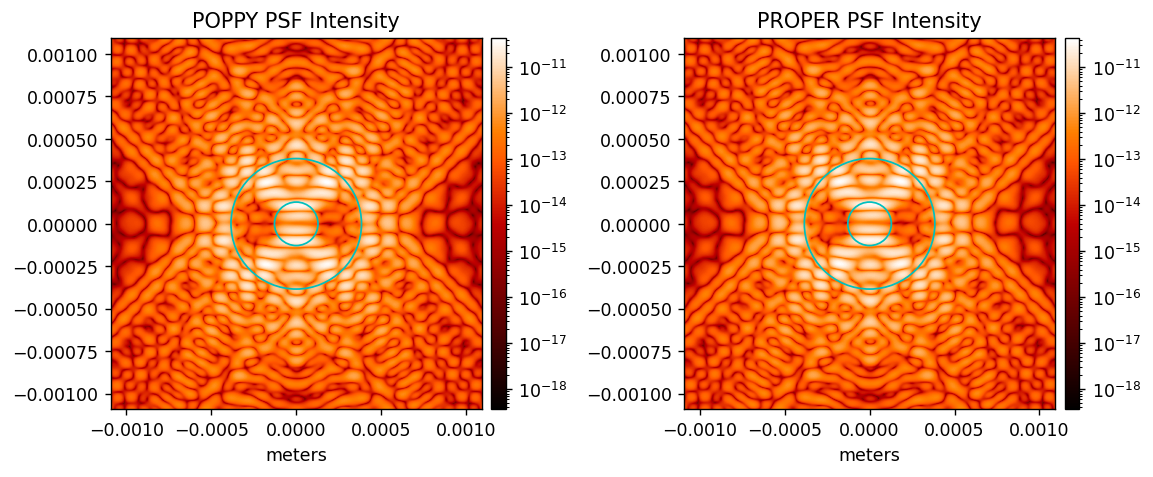

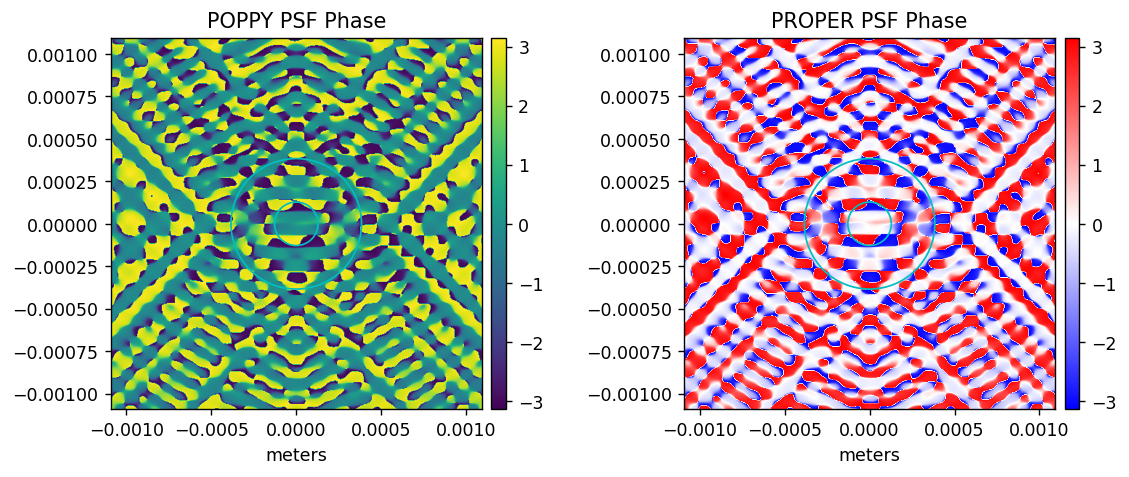

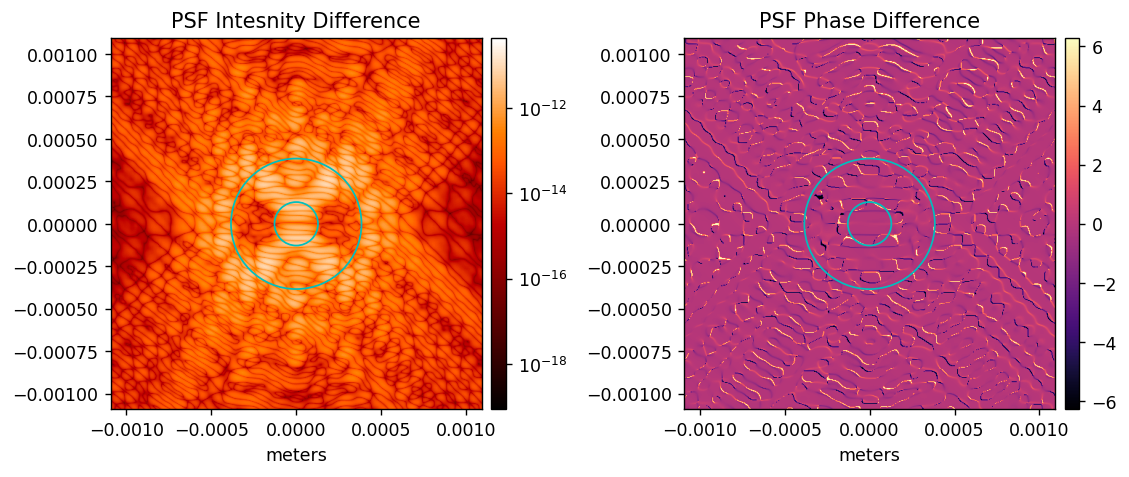

In [35]:
reload(modes)
modes.compare_psfs(wfs[-1], mode, rotate=True)


In [55]:
reload(modes)
modes.save_waves(mode, wfs, use_apertures, use_errors)

Saving wavefronts: 
0 Saved pupil wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_pupil_poppy.fits
1 Saved primary wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_primary_poppy.fits
2 Saved primary_opd wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_primary_opd_poppy.fits
3 Saved g20_opd wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_g20_opd_poppy.fits
4 Saved secondary wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_secondary_poppy.fits
5 Saved secondary_opd wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_secondary_opd_poppy.fits
6 Saved fold1 wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_fold1_poppy.fits
7 Saved fold1_opd wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_fold1_opd_poppy.fits
8 Saved m3 wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_m3_poppy.fits
9 Saved m3_opd wavefront to /groups/douglase/spc730-fresnel-wavefronts/wf_m3_opd_poppy.fits
10 Saved m4 wavefront to /groups

# random testing

# Testing

DEBUG:poppy:Padded WF array for oversampling by 2, to (2048, 2048).
(2048, 2048) complex128


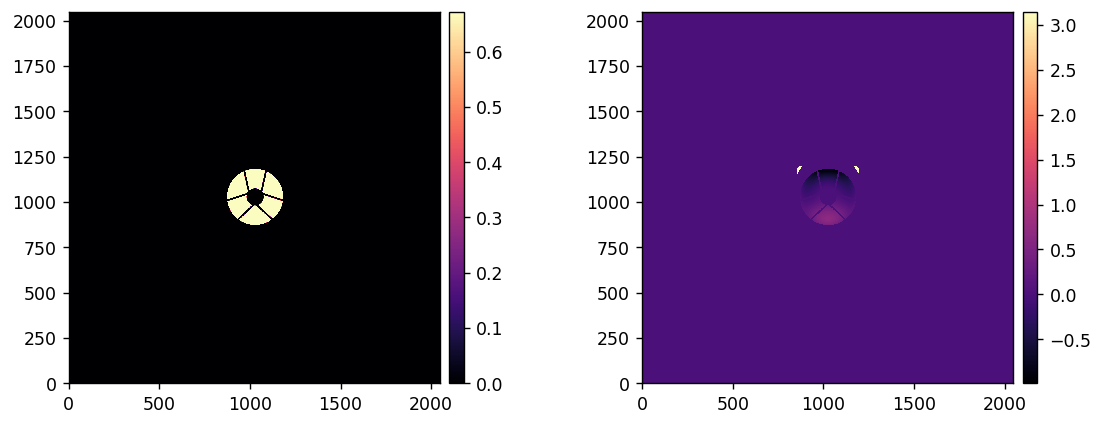

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8c94a928d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c9502d390>)

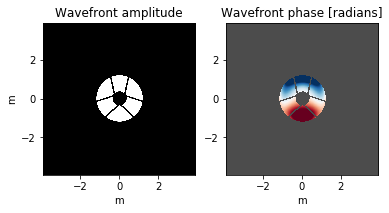

In [24]:
npix=1024
oversample=2
lambda_m = 575e-9*u.m
D = 2.3633372*u.m * 1024/309
wfin = poppy.FresnelWavefront(beam_radius=D/2, wavelength=lambda_m, npix=npix, oversample=oversample)

polfile = '/groups/douglase/webbpsf-data/CGI/optics/pol/new_toma'
polaxis = 10
polmap.polmap( wfin, polfile, 309, polaxis )

pupil_fname = '/groups/douglase/webbpsf-data/CGI/optics/F575/run461_pupil_rotated.fits'
pupil_data = misc.trim(fits.getdata(pupil_fname), npix*oversample)
wfin.wavefront *= pupil_data

print(wfin.wavefront.shape, wfin.wavefront.dtype)
misc.myimshow2(np.abs(wfin.wavefront), np.angle(wfin.wavefront))
wfin.display(what='both')

DEBUG:poppy:Trans: /groups/douglase/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:OPD: None
INFO:poppy:SPM OPD: Loaded amplitude transmission from /groups/douglase/webbpsf-data/CGI/optics/F825/SPM_SPC-20181220_1000_rounded9_gray.fits
DEBUG:poppy:Trans: None
DEBUG:poppy:OPD: /groups/douglase/webbpsf-data/CGI/OPD-new/wfirst_phaseb_PUPILMASK730_phase_error_V1.0.fits
DEBUG:poppy:No transmission supplied - will assume uniform throughput = 1 
INFO:poppy:SPM OPD: Loaded OPD from /groups/douglase/webbpsf-data/CGI/OPD-new/wfirst_phaseb_PUPILMASK730_phase_error_V1.0.fits
INFO:poppy:No info supplied on amplitude transmission; assuming uniform throughput = 1


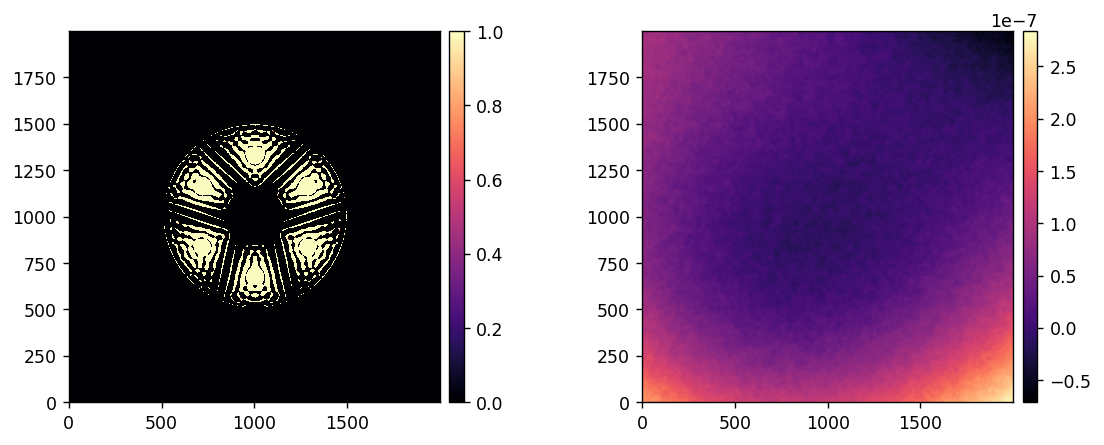

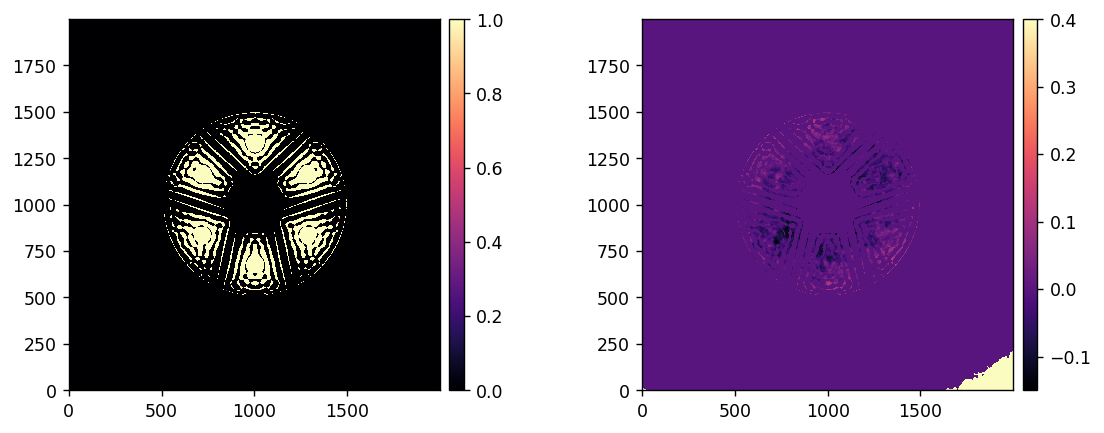

In [8]:
opddir = '/groups/douglase/webbpsf-data/CGI/OPD-new/'
opticsdir = '/groups/douglase/webbpsf-data/CGI/optics/F825/'

spm = poppy.FITSOpticalElement('SPM OPD',
                               opticsdir+'SPM_SPC-20181220_1000_rounded9_gray.fits', 
                               planetype=PlaneType.pupil)
spm_opd = poppy.FITSOpticalElement('SPM OPD',
                                   opd=opddir+'wfirst_phaseb_PUPILMASK730_phase_error_V1.0.fits',
                                   opdunits='meters',
                                   planetype=PlaneType.intermediate)

spm_amp = misc.trim(spm.amplitude, 2000)
spm_opd = misc.trim(spm_opd.opd, 2000)
spm_phasor = spm_amp*np.exp(1j*2*np.pi/825e-9 * spm_opd)
misc.myimshow2(spm_amp, spm_opd)
misc.myimshow2(np.abs(spm_phasor), np.angle(spm_phasor),
               vmax2=0.4)
# print(spm.pixelscale, spm_opd.pixelscale)